#### Q4. Linear Regression – Stackloss
• Read the stackloss dataset from stackloss.csv.
• Get a summary of numerical features
• Get a matrix of correlation coefficients between the variables
• Draw a matrix of scatterplots.
• Which input variables correlate the most strongly with stackloss?
• Build a linear regression for stackloss in terms of the other (input) variables.
• Print out the interface and the coefficients of the input variables.
• For new input data - newData = [[72, 20, 85]], make a prediction for the stackloss

In [7]:
import pandas as pd

df = pd.read_csv("../data/stackloss.csv")
print(df.head())
#print(df.describe())
print("Rows:", len(df))
print("Columns:", len(df.columns))

print("matrix of correlation coefficients between the variables: ", df.corr())

   AirFlow  WaterTemp  AcidConc  StackLoss
0       80         27        89         42
1       80         27        88         37
2       75         25        90         37
3       62         24        87         28
4       62         22        87         18
Rows: 21
Columns: 4
matrix of correlation coefficients between the variables:              AirFlow  WaterTemp  AcidConc  StackLoss
AirFlow    1.000000   0.781852  0.500143   0.919663
WaterTemp  0.781852   1.000000  0.390940   0.875504
AcidConc   0.500143   0.390940  1.000000   0.399830
StackLoss  0.919663   0.875504  0.399830   1.000000


array([[<Axes: xlabel='AirFlow', ylabel='AirFlow'>,
        <Axes: xlabel='WaterTemp', ylabel='AirFlow'>,
        <Axes: xlabel='AcidConc', ylabel='AirFlow'>,
        <Axes: xlabel='StackLoss', ylabel='AirFlow'>],
       [<Axes: xlabel='AirFlow', ylabel='WaterTemp'>,
        <Axes: xlabel='WaterTemp', ylabel='WaterTemp'>,
        <Axes: xlabel='AcidConc', ylabel='WaterTemp'>,
        <Axes: xlabel='StackLoss', ylabel='WaterTemp'>],
       [<Axes: xlabel='AirFlow', ylabel='AcidConc'>,
        <Axes: xlabel='WaterTemp', ylabel='AcidConc'>,
        <Axes: xlabel='AcidConc', ylabel='AcidConc'>,
        <Axes: xlabel='StackLoss', ylabel='AcidConc'>],
       [<Axes: xlabel='AirFlow', ylabel='StackLoss'>,
        <Axes: xlabel='WaterTemp', ylabel='StackLoss'>,
        <Axes: xlabel='AcidConc', ylabel='StackLoss'>,
        <Axes: xlabel='StackLoss', ylabel='StackLoss'>]], dtype=object)

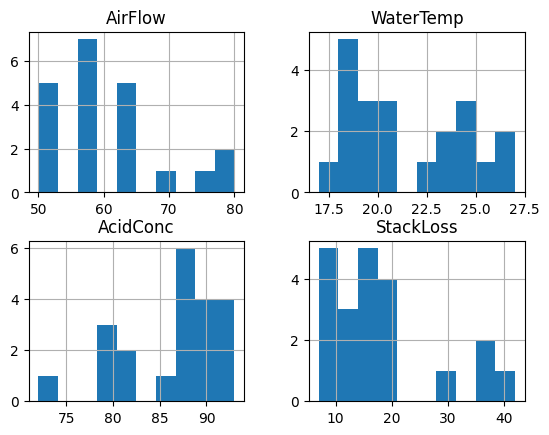

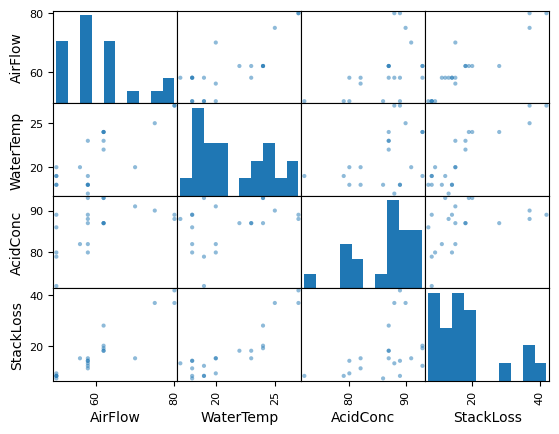

In [11]:
# Matrix of scatter plots
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
df.hist()
scatter_matrix(df)
#plt.show()

#### Build a linear regression for stackloss in terms of the other (input) variables.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.describe())
print(X_train.shape)
print(X_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept:" ,model.intercept_)
print("Slope:", model.coef_)
print("RSquared:", model.score(X_test,y_test))


(15, 3) (6, 3) (15,) (6,)
         AirFlow  WaterTemp   AcidConc
count  15.000000  15.000000  15.000000
mean   63.266667  21.733333  86.800000
std     8.932018   3.283436   5.747049
min    50.000000  17.000000  72.000000
25%    58.000000  19.000000  84.500000
50%    62.000000  22.000000  88.000000
75%    66.000000  24.000000  90.500000
max    80.000000  27.000000  93.000000
(15, 3)
(6, 3)
Intercept: -36.69140840591725
Slope: [ 0.81826835  1.20212439 -0.24889254]
RSquared: 0.7374697547521836


In [18]:
from sklearn.metrics import mean_squared_error

yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

TypeError: got an unexpected keyword argument 'squared'

#### For new input data - newData = [[72, 20, 85]], make a prediction for the stackloss.

In [19]:
newData = [[72,20,85]]

newDf = pd.DataFrame(newData, columns=['AirFlow', 'WaterTemp', 'AcidConc'])
print(newDf)

y_hat = model.predict(newDf)
print('y_hat', y_hat)

   AirFlow  WaterTemp  AcidConc
0       72         20        85
y_hat [25.11053454]
